# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 15 May 2018



Simple test to call on-line libradtran to check if it is working

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [2]:
from scipy.interpolate import interp1d

In [3]:
from librtsimana import *
from libsimulateTranspCTIOScattAbsAer import *

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
all_transmission=np.loadtxt('transmission.txt')

In [6]:
NBOBS=all_transmission.shape[1]
NBWLBINS=all_transmission.shape[0]

In [7]:
airmasses=np.linspace(1.,2.,NBOBS)
pressure = 782.5
pwv=4.0
aer=0
ozone=300.

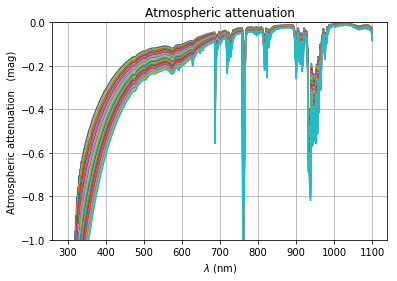

In [8]:
idx=0
for am in airmasses:
    plt.plot(WL,2.5*np.log10(all_transmission[:,idx]))
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation   (mag)")
plt.title("Atmospheric attenuation")
plt.ylim(-1.,0.)
plt.grid()

In [9]:
thetitle='Atmospheric attenuation 400-600 nm'

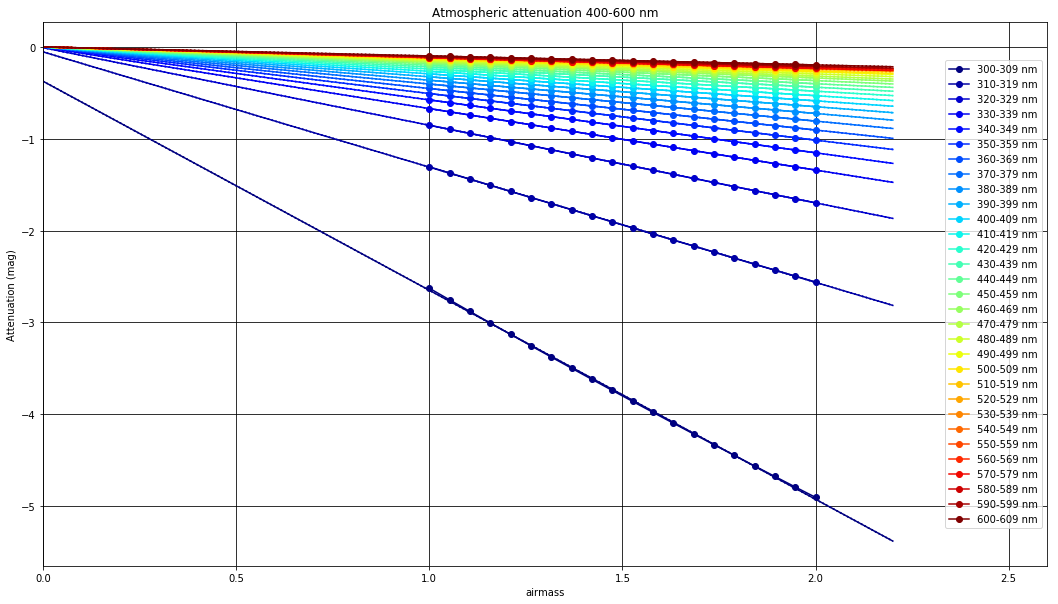

In [10]:
x1,y1,err1=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=300.,ZMAX=600.,Wwidth=11,Bwidth=10,Mag=True)

In [11]:
thetitle='Atmospheric attenuation 600-1000 nm'

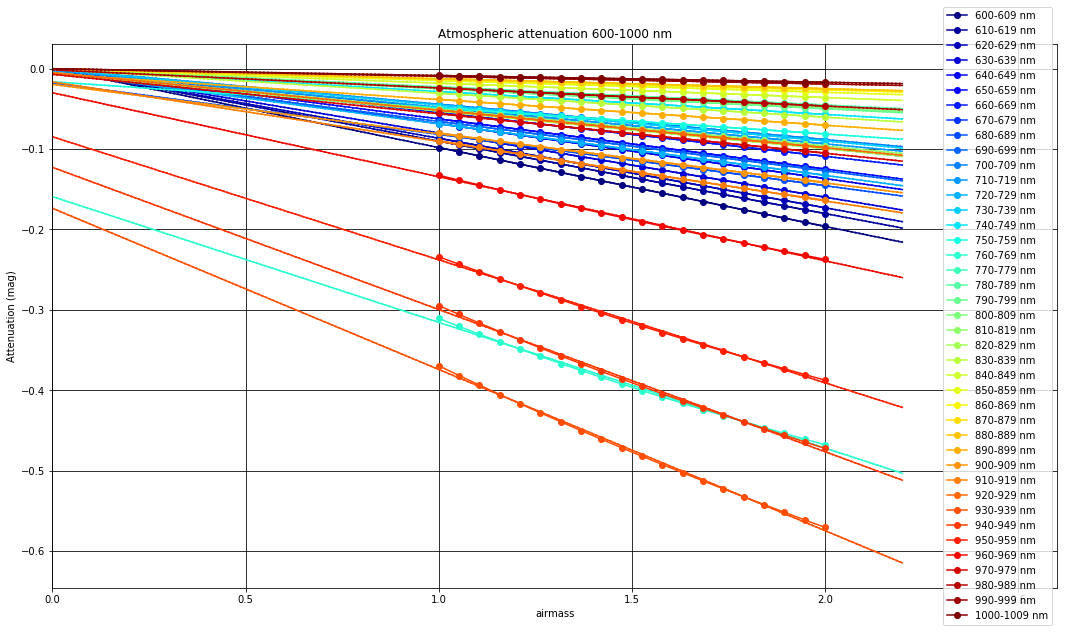

In [12]:
x2,y2,err2=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=600.,ZMAX=1000.,Wwidth=11,Bwidth=10,Mag=True)

In [13]:
wl=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
err=np.zeros(len(y))

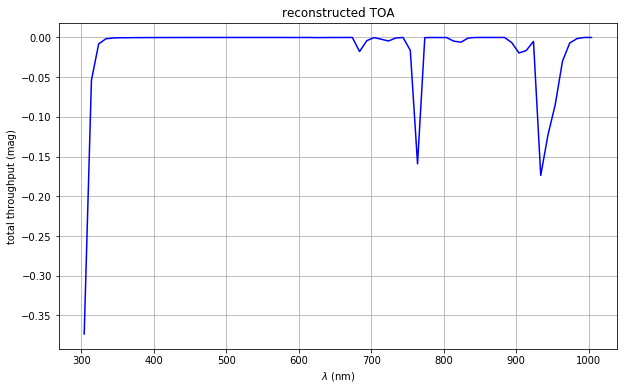

In [14]:
PlotOpticalThroughput(wl,y,err,"reconstructed TOA")

# Multi realisations

# Random realisations

In [15]:
NREALIZATIONS=500

In [16]:
SIGMAWL=1.0

## curves

In [17]:
all_wl,all_y,all_err=GenerateBouguerInterceptRandom(airmasses,all_transmission,sigma_wl=SIGMAWL,nb_realizations=NREALIZATIONS)

In [18]:
thetitle='Bouguer error $\sigma(\lambda)$= {} nm, nb. rand. realizations = {}'.format(SIGMAWL,NREALIZATIONS)

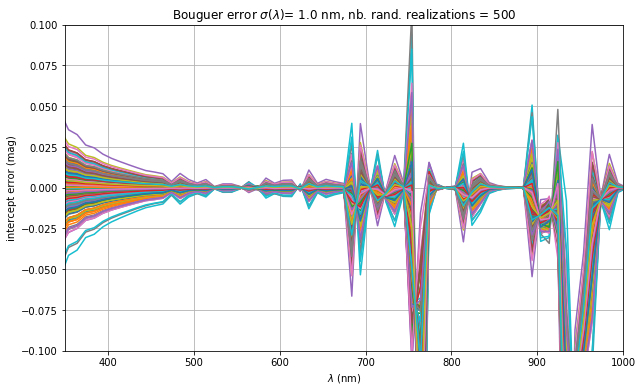

In [19]:
PlotBouguerInterceptError(all_wl,all_y,thetitle)

## Histogram

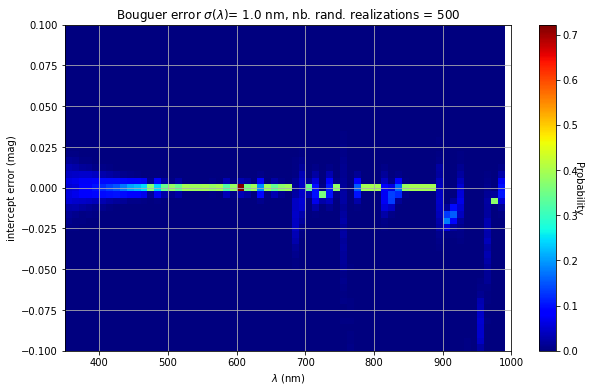

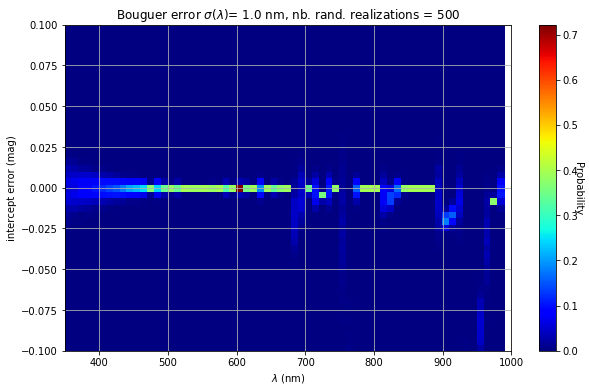

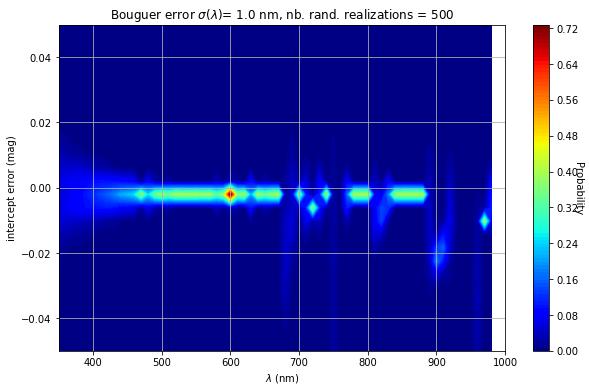

In [20]:
PlotHist2dBouguerInterceptErrorRandom(all_wl,all_y,thetitle)

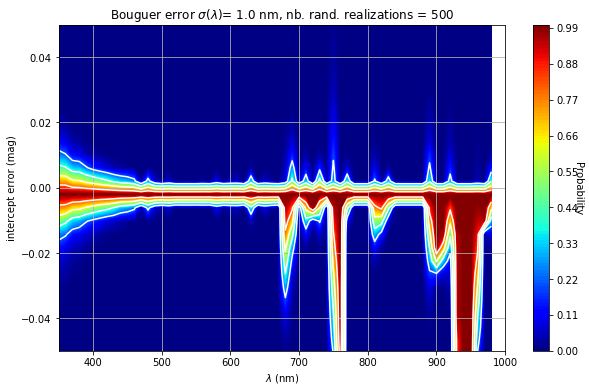

In [21]:
PlotContourdBouguerInterceptErrorRandom(all_wl,all_y,thetitle)

## Realisations not random sigmas\_wl

In [22]:
SIGMAWL=np.array([0.,1.,3.,5.,10.,20.,50.])

In [23]:
NREALIZATIONS=len(SIGMAWL)

In [24]:
all_wl,all_y,all_err=GenerateBouguerIntercept(airmasses,all_transmission,all_sigma_wl=SIGMAWL,nb_realizations=NREALIZATIONS)

librtsimana.py:271: RuntimeWarning: divide by zero encountered in log10
  newY0=2.5*np.log10(Y0)


In [25]:
thetitle='Bouguer error $\sigma(\lambda)$= {} nm, nb.  realizations = {}'.format(SIGMAWL,NREALIZATIONS)

librtsimana.py:411: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sigma_wl==None:


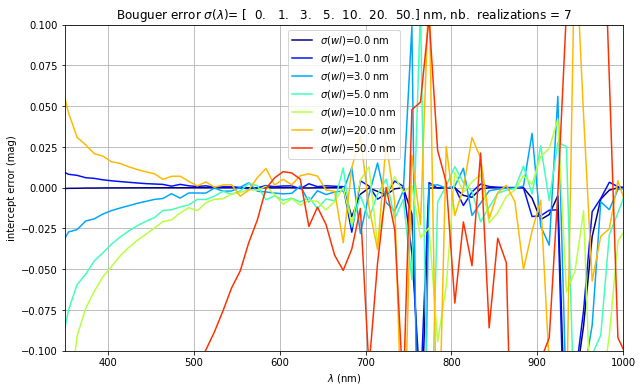

In [26]:
PlotBouguerInterceptError(all_wl,all_y,thetitle,sigma_wl=SIGMAWL)